In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

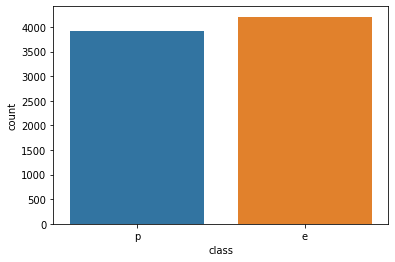

In [6]:
#Class Distribution

sns.countplot(x = 'class', data = df)

In [7]:
dist = df['class'].value_counts()
print(dist)

e    4208
p    3916
Name: class, dtype: int64


In [8]:
#Probability of predicting a certain class 

p_p = dist[0]/(dist[0]+dist[1])
p_e = dist[1]/(dist[0]+dist[1])
print(p_p,p_e)

0.517971442639094 0.48202855736090594


In [9]:
#Feature Transformation
#Convert categorical values to numerical values 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [10]:
df.head()
# p is mapped to 1 and e is mapped to 0

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


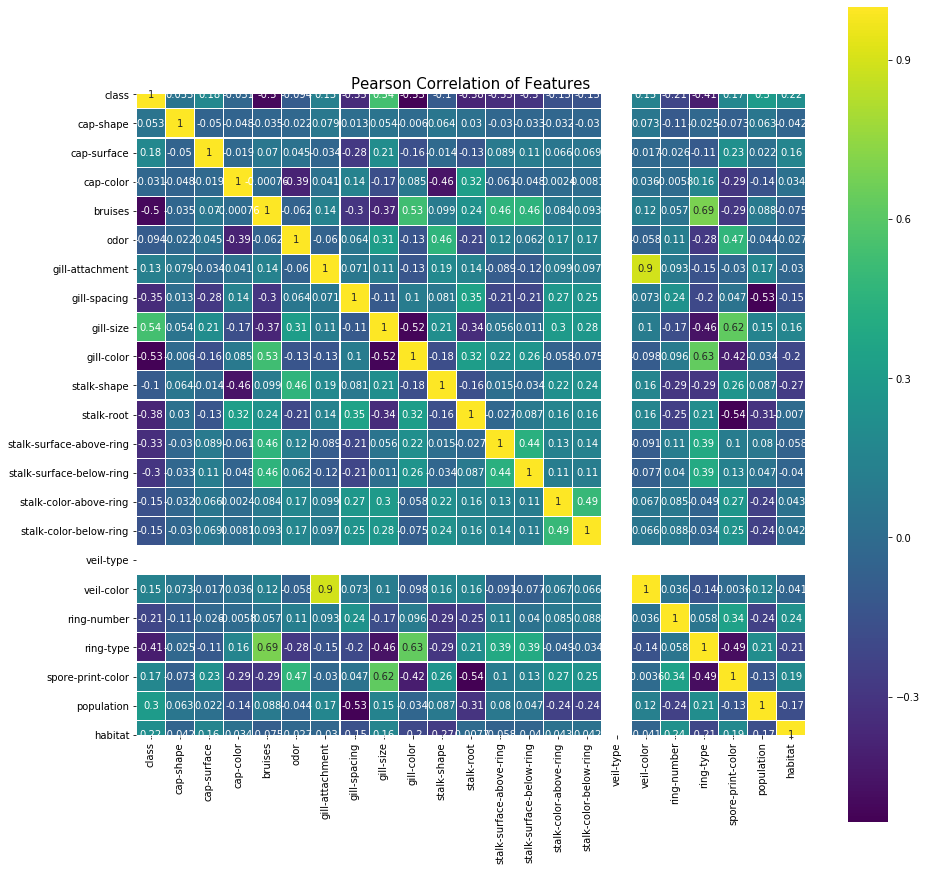

In [11]:
#Pearson Correlation Heatmap 

colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [12]:
X = df.drop('class', axis=1)
y = df['class'] 

In [13]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [ ]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [16]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [17]:
#SVC 
from sklearn.svm import SVC 

In [18]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [19]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [21]:
classifiers = [ LogisticRegression(random_state = 0),
               KNeighborsClassifier(n_neighbors = 3),
               SVC(kernel = 'rbf', C=0.025, probability=True, random_state = 0),
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
               RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0),
               GaussianNB() ]

In [32]:
#Logging for Visual Comparison

log_cols = ['Classifier','Accuracy']
#log = pd.DataFrame(columns=log_cols)

In [33]:
for clf in classifiers:
    clf.fit(X_train,y_train)
    name = clf.__class__.__name__
    
    print('-'*60)
    print(name)
    
    print("----Results----")
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print("Accuracy = {}".format(acc))
    class_report = classification_report(y_test,pred) 
    print(class_report)
    
    log = pd.DataFrame(([name,acc,class_report],log_cols))
    #log = log.append(log_entry)
    
print('-'*60)
    

C:\Users\Adithya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


------------------------------------------------------------
LogisticRegression
----Results----
Accuracy = 0.9458461538461539
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       851
           1       0.96      0.93      0.94       774

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

------------------------------------------------------------
KNeighborsClassifier
----Results----
Accuracy = 0.9993846153846154
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



C:\Users\Adithya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


------------------------------------------------------------
SVC
----Results----
Accuracy = 0.9563076923076923
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       851
           1       1.00      0.91      0.95       774

    accuracy                           0.96      1625
   macro avg       0.96      0.95      0.96      1625
weighted avg       0.96      0.96      0.96      1625

------------------------------------------------------------
DecisionTreeClassifier
----Results----
Accuracy = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

------------------------------------------------------------
RandomForestClassifier
----Results----
Accuracy = 1.0
     